# 4 Parameter Logistics Fit

### This notebook fits a 4 Parameter Logistics (4PL) equation often found in fitting biological data such as an ELISA curve. First we make a class called Four_Parameter_L that has all the functions and stats to fit the 4 parameter logistics fit. We will use least squares method to fit the equation. Next, we declare the class Four_Parameter_L and then feed it data for x and y coordinates. The output will be the parameters A, B, C, D, R^2 and the sum squares of the fit. We will use sympy to rearrange the 4PL to obtain a concentration of our unknown sample.

In [14]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats.distributions import t
import matplotlib.pyplot as plt
import sympy, math

In [15]:
#4 Parameter Logistics Fit
def func (x, A, B, C, D):
        return ((A-D)/(1+((x/C)**B))) + D

#4PL with fit and stats
class Four_Parameter_L():
    
    def x(self):
        self.x
        
    def y(self):
        self.y
        
    def params(self):
        params = pars
        params.self  
        
    def fits(self, A, B, C, D):   
        pars, pcov = curve_fit(func, self.x, self.y, p0=(A, B, C, D))
        residuals = self.y - func(self.x,pars[0],pars[1],pars[2],pars[3])
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((self.y-np.mean(self.y))**2)
        r_squared = 1 - (ss_res/ss_tot)
        alpha = 0.05 # 95% confidence interval = 100*(1-alpha)
        n = len(self.y)    # number of data points
        p = len(pars) # number of parameters
        dof = max(0, n - p) # number of degrees of freedom
        # student-t value for the dof and confidence level
        tval = t.ppf(1.0-alpha/2., dof) 
        for i, p,var in zip(range(n), pars, np.diag(pcov)):
            sigma = var**0.5
            print ('p{0}: [{1} [{2}  {3}]'.format(i, p, p - sigma*tval, p + sigma*tval))    
            
        print ("")
        print ("")
        print ("A is:", round(pars[0],1), "+/-", round(np.sqrt(pcov[0,0]),1))
        print ("B is:", round(pars[1],1),"+/-", round(np.sqrt(pcov[1,1]),1))
        print ("C is:", round(pars[2],1), "+/-", round(np.sqrt(pcov[2,2]),1))
        print ("D is:", round(pars[3],1),"+/-", round(np.sqrt(pcov[3,3]),1))
        print ("R^2 is:", round(r_squared,2))
        print ("Sum Squares is:", round(ss_res,2))
        plt.plot(self.x,self.y,'o')
        xfit = np.linspace(min(self.x),max(self.x), 100)
        yfit = func(xfit, pars[0], pars[1],pars[2],pars[3])
        plt.plot(xfit,yfit,'-')
        plt.legend(['data','fit'],loc='best')
        plt.xscale('log')
        self.yfit = yfit #for graphing model
        self.params = pars

### 4PL Equation

In [22]:
func(x, A, B, C, D)

D + (A - D)/((x/C)**B + 1)

# Declare Four_Parameter_L Class

p0: [0.37681675423958566 [0.13574218711592356  0.6178913213632478]
p1: [1.9427457819944285 [1.213854573774956  2.671636990213901]
p2: [60.027258999274906 [48.22588358019103  71.82863441835879]
p3: [2.5590607527117135 [2.4059824320254557  2.7121390733979713]


A is: 0.4 +/- 0.1
B is: 1.9 +/- 0.3
C is: 60.0 +/- 4.3
D is: 2.6 +/- 0.1
R^2 is: 1.0
Sum Squares is: 0.02


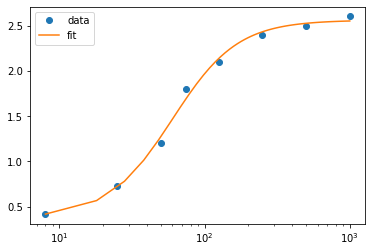

In [17]:
A = Four_Parameter_L()
A.x = np.array([8, 25, 50, 75, 125 ,250,500,1000])
A.y = np.array([ .42, .73, 1.2, 1.8 ,2.1, 2.4 ,2.5 ,2.6])
A.fits(1,1,1,1) #Initial Guess for A,B,C,D
parameters = A.params #Assign A,B,C,D values to paramters

#p0 95% Confindence Interval for A
#p1 95% Confindence Interval for B
#p2 95% Confindence Interval for C
#p3 95% Confindence Interval for D

### Using sympy, we can rearrange the 4PL equation in terms of x to obtain the concentration of our sample

In [18]:
x,y,A,B,C,D = sympy.symbols('x,y,A,B,C,D')
eq = sympy.Eq(((A-D)/(1+((x/C)**B))) + D,y)
sympy.solve(eq,x)

[C*((-A + y)/(D - y))**(1/B)]

### Making a function to solve for our unknown concentration. We will use the equation that was solved from our previous step

In [19]:
def unknown_4PL(y, A, B, C, D):
    return (C*((-A + y)/(D - y))**(1/B))

### Our 4PL equation rearanged to solve for x

In [20]:
unknown_4PL(y, A, B, C, D)

C*((-A + y)/(D - y))**(1/B)

### Plug in our unknown value (y) and the parameters we obtained from our 4PL curve (A, B, C, D) to get the concentration of our sample

In [23]:
unknown = 1.5 #our sample gave us a reading of 1.5

round(unknown_4PL(unknown, parameters[0], parameters[1], parameters[2], parameters[3]),1)

61.9

### Our sample was determined to be 61.9